In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set default theme
sns.set_theme()

# TODO

## Tablet familiarity

In [3]:
df = pd.read_csv("form_data/familiarity_with_tablet.csv")
df

,How familiar are you with drawing tablet?
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,2


<AxesSubplot: xlabel='How familiar are you with drawing tablet?', ylabel='Count'>

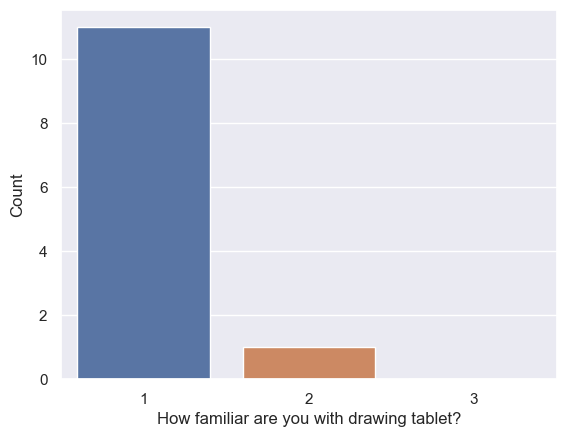

In [4]:
ax = sns.countplot(x=df["How familiar are you with drawing tablet?"], order=[1, 2, 3])
ax.set(ylabel="Count")
ax

## Form results analysis

In [5]:
transformation = {
  'Graphic Table / Bubble': 'TB',
  'Graphic Table / No bubble': 'TN',
  'Mouse / Bubble': 'MB',
  'Mouse / No bubble': 'MN',
}

In [6]:
df = pd.read_csv("form_data/organized.csv")
df["Input method"] = df["Input method"].replace(transformation)
df

,Input method,How mentally demanding was the task?,How physically demanding was the task?,How successful were you in accomplishing what you were asked to do?,How hard did you have to work to accomplish your level of performance?,"How insecure, discouraged, irritated, stressed, and annoyed were you?"
0,TB,7,4,8,5,9
1,TB,2,4,8,1,1
2,TB,6,4,8,6,3
3,TB,1,2,9,1,1
4,TB,5,3,8,7,1
5,TB,5,5,10,2,2
6,TB,6,7,7,6,4
7,TB,3,7,7,5,6
8,TB,5,1,10,1,1
9,TB,1,2,10,1,1


In [7]:
order = ["MN", "TN", "MB", "TB"]

<AxesSubplot: xlabel='Input method', ylabel='How mentally demanding was the task?'>

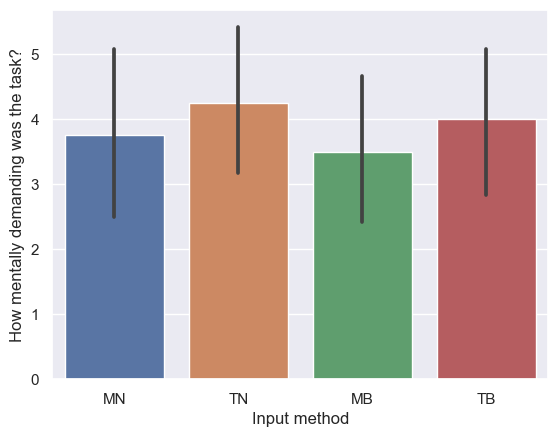

In [8]:
sns.barplot(y="How mentally demanding was the task?", x="Input method", data=df, order=order)

<AxesSubplot: xlabel='Input method', ylabel='How physically demanding was the task?'>

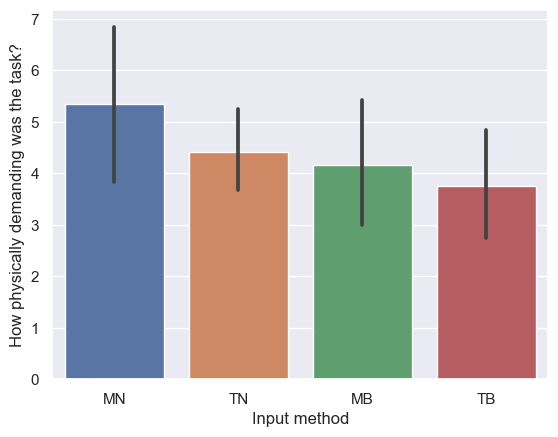

In [9]:
# Maybe look into why mouse / no bubble
sns.barplot(y="How physically demanding was the task?", x="Input method", data=df, order=order)

Text(0, 0.5, 'How successful were you in accomplishing\nwhat you were asked to do?')

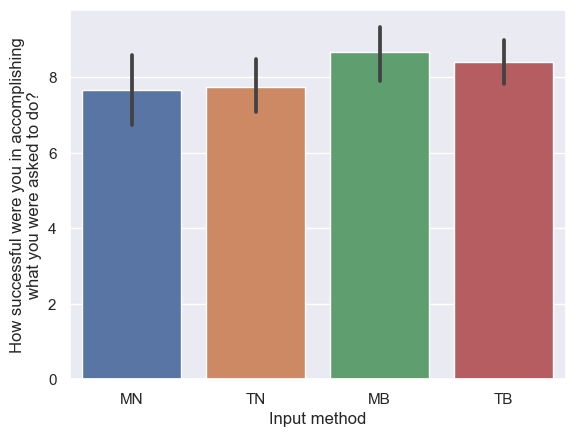

In [10]:
ax = sns.barplot(y="How successful were you in accomplishing what you were asked to do?", x="Input method", data=df, order=order)
ax.set_ylabel(r"How successful were you in accomplishing" + "\n" + "what you were asked to do?")

Text(0, 0.5, 'How hard did you have to work\nto accomplish your level of performance?')

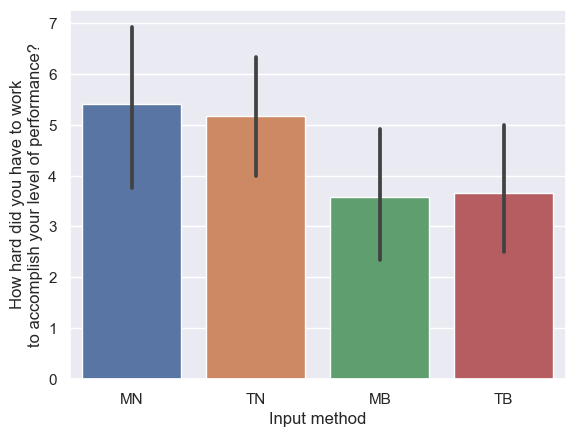

In [11]:
ax = sns.barplot(y="How hard did you have to work to accomplish your level of performance?", x="Input method", data=df, order=order)
ax.set_ylabel(r"How hard did you have to work" + "\n" + "to accomplish your level of performance?")

Text(0, 0.5, 'How insecure, discouraged, irritated,\nstressed, and annoyed were you?')

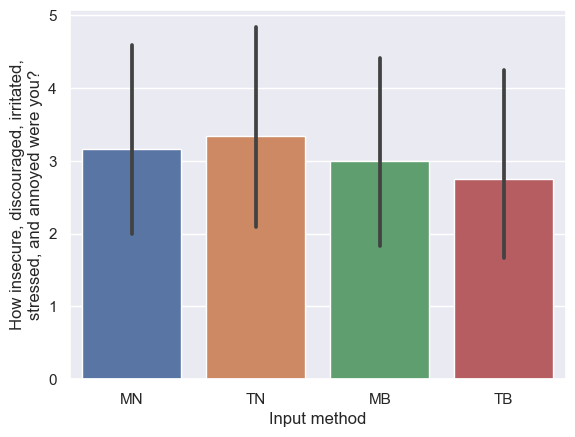

In [12]:
ax = sns.barplot(y="How insecure, discouraged, irritated, stressed, and annoyed were you?", x="Input method", data=df, order=order)
ax.set_ylabel(r"How insecure, discouraged, irritated," + "\n" + "stressed, and annoyed were you?")

In [13]:
df2 = df.melt(id_vars=["Input method"], var_name="Question", value_name="Score")
df2

,Input method,Question,Score
0,TB,How mentally demanding was the task?,7
1,TB,How mentally demanding was the task?,2
2,TB,How mentally demanding was the task?,6
3,TB,How mentally demanding was the task?,1
4,TB,How mentally demanding was the task?,5
...,...,...,...
235,MN,"How insecure, discouraged, irritated, stressed...",1
236,MN,"How insecure, discouraged, irritated, stressed...",2
237,MN,"How insecure, discouraged, irritated, stressed...",4
238,MN,"How insecure, discouraged, irritated, stressed...",6


In [14]:
import matplotlib.colors as mcolors

def plot_stacked_bar(question, flipped=False):
  # group data by 'Input method' and 'Score' columns
  one_q = df2[df2["Question"] == question]
  one_q.drop(columns=["Question"], inplace=True)
  df_grouped = one_q.groupby(['Input method','Score']).size().unstack()
  df_grouped = df_grouped.fillna(0)
  for i in range(1, 11):
      if i not in df_grouped.columns:
        df_grouped[i] = 0.
        
  # todo: make this better
  if flipped:
    df_grouped = df_grouped.rename(columns={i: 11 - i for i in range(1, 11)})
    df_grouped = df_grouped.sort_index(axis=1, ascending=False)
  
  # Define a color map
  sns.set_palette(sns.color_palette("RdYlGn_r", n_colors=10))
  if flipped:
    sns.set_palette(sns.color_palette("RdYlGn", n_colors=10))

  # plot the stacked bar chart
  ax = df_grouped.plot(kind='barh', stacked=True, edgecolor='black', linewidth=0.5)

  # add a title and labels to the chart
  plt.title(question)
  if flipped:
    plt.title(question + " (Flipped)")
  plt.xlabel('Input Method')
  plt.ylabel('Count of Users')

  # show the legend
  plt.legend(title='Score', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})

  # show the chart
  plt.show()
  

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_2627/2588776622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_q.drop(columns=["Question"], inplace=True)


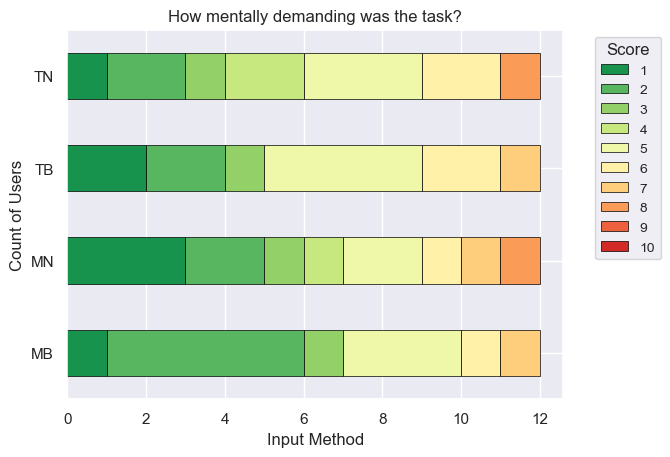

In [15]:
plot_stacked_bar("How mentally demanding was the task?")

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_2627/2588776622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_q.drop(columns=["Question"], inplace=True)


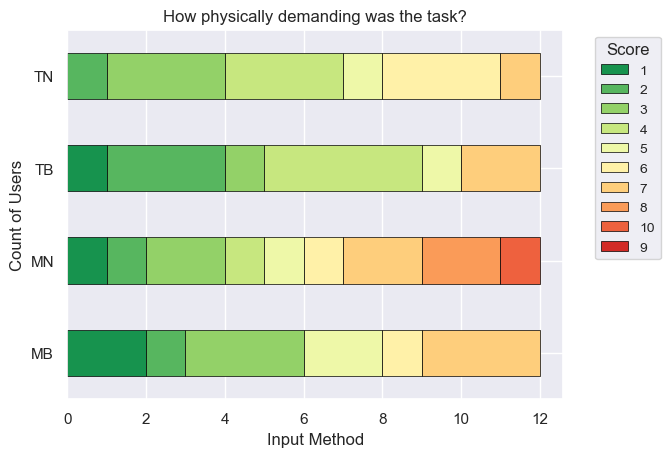

In [16]:
plot_stacked_bar("How physically demanding was the task?")

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_2627/2588776622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_q.drop(columns=["Question"], inplace=True)


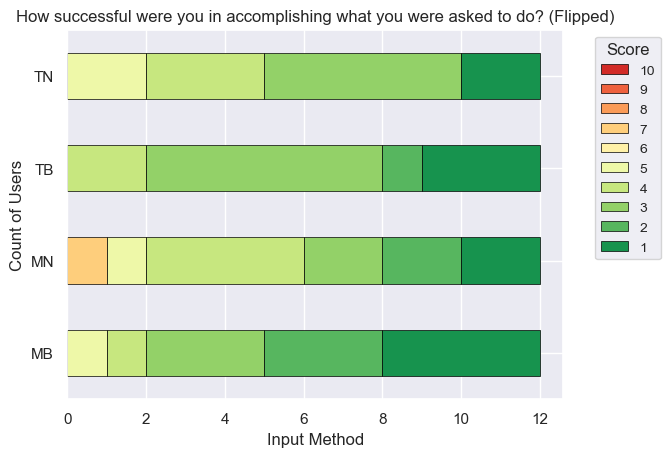

In [17]:
plot_stacked_bar("How successful were you in accomplishing what you were asked to do?", flipped=True)

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_2627/2588776622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_q.drop(columns=["Question"], inplace=True)


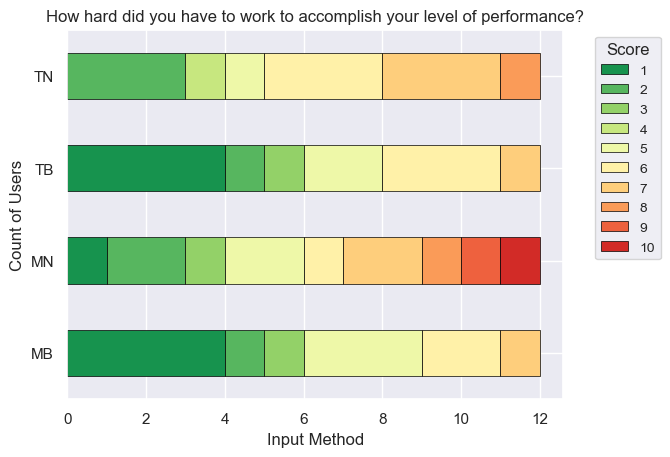

In [18]:
plot_stacked_bar("How hard did you have to work to accomplish your level of performance?")

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_2627/2588776622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_q.drop(columns=["Question"], inplace=True)


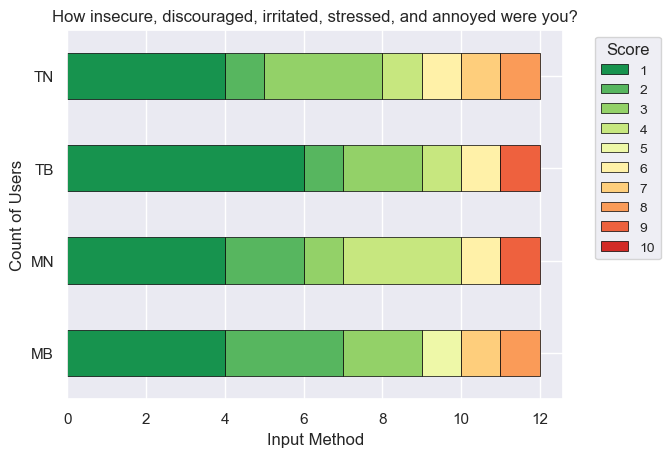

In [19]:
plot_stacked_bar("How insecure, discouraged, irritated, stressed, and annoyed were you?")

In [20]:
# reset theme
sns.set_theme()

/opt/homebrew/Caskroom/miniconda/base/envs/m/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


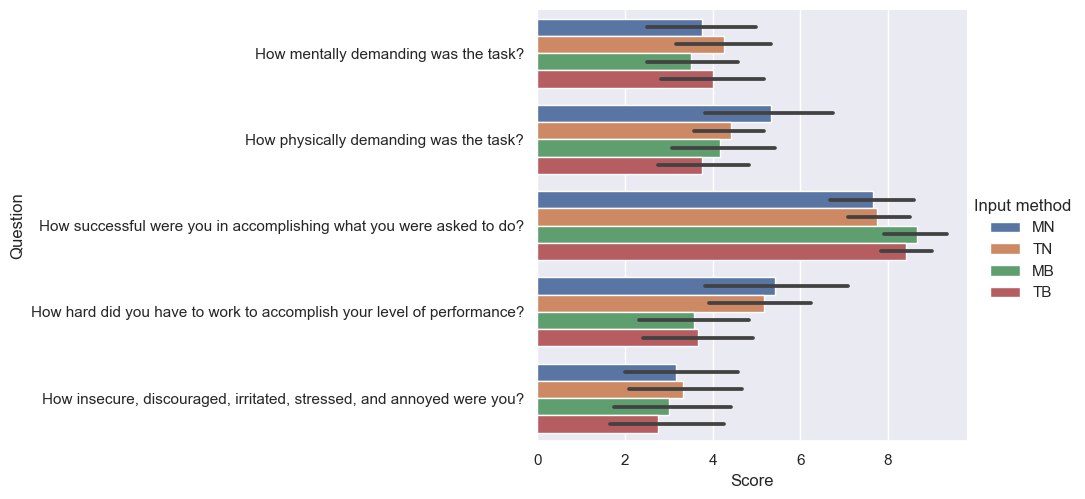

In [21]:
sns.catplot(
  data=df2, kind="bar",
  x="Score", y="Question", hue="Input method", hue_order=order
)